In [9]:
from thinkdsp import read_wave
from thinkdsp import decorate


In [49]:
wave = read_wave('spectral/514475__metrostock99__a-thought-provoking-quote-of-the-day.wav')

In [50]:
wave.make_audio()

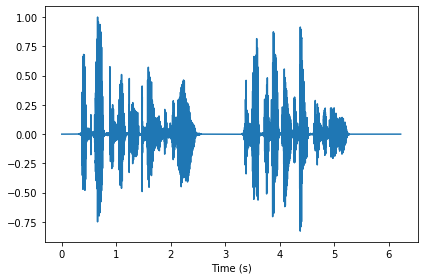

In [67]:
wave.normalize()
wave.apodize()
wave.plot()
decorate(xlabel='Time (s)')

In [68]:
segment = wave.segment(start=0.36, duration=0.8)

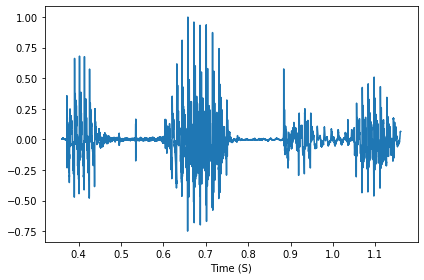

In [69]:
segment.plot()
decorate(xlabel='Time (S)')

In [79]:
spectrum = segment.make_spectrum()

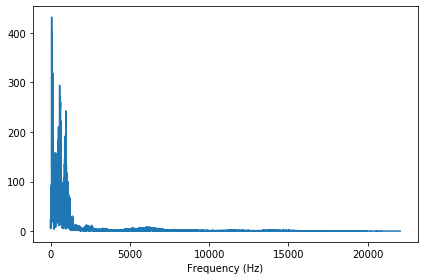

In [80]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

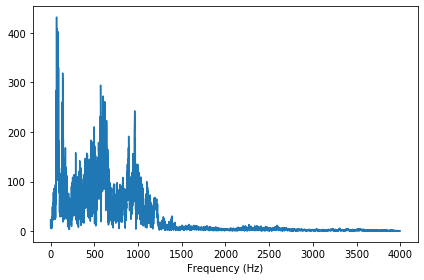

In [81]:
spectrum.plot(high=4000)
decorate(xlabel='Frequency (Hz)')

In [110]:
spectrum = segment.make_spectrum()
spectrum.low_pass(15000)

In [111]:
filtered = spectrum.make_wave()

In [112]:
segment.make_audio()

In [113]:
filtered.make_audio()

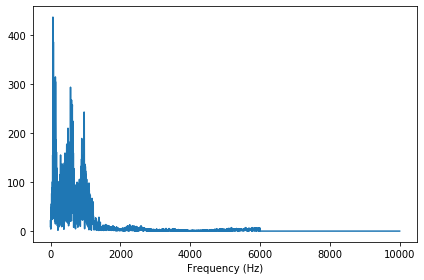

In [90]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

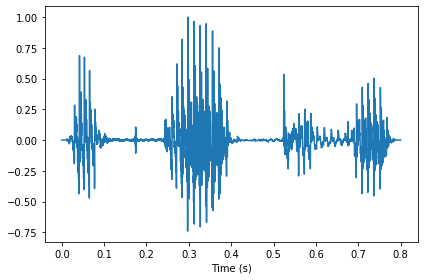

In [91]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

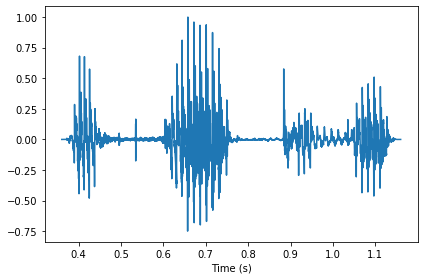

In [92]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [93]:
segment.make_audio()

In [94]:
filtered.make_audio()

In [114]:
def  stretch(wave, ts):
    wave.ts = wave.ts*ts
    return wave

To modify a wave, you can access thetsandysdirectly.  For example:wave.ys *= 2
                                                                  wave.ts += 1

In [121]:
segment = wave.segment(start=0.36, duration=0.8)

In [122]:
segment.ts

array([0.36      , 0.36002268, 0.36004535, ..., 1.15993197, 1.15995465,
       1.15997732])

In [118]:
segment  = stretch(segment, 4)

In [120]:
segment.ts

array([2.88      , 2.88018141, 2.88036281, ..., 9.27945578, 9.27963719,
       9.27981859])

In [119]:
segment.make_audio()

In [128]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "output.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()


Recording
Finished recording


In [124]:
!pip install sounddevice

In [126]:
wave = read_wave('output.wav')

Error: unknown format: 3

In [127]:
!ls

100475__iluppai__saxophone-weep.wav	     chap08soln.ipynb
105977__wcfl10__favorite-station.wav	     chap09.ipynb
120994__thirsk__120-oboe.wav		     chap09soln.ipynb
132736__ciccarelli__ocean-waves.wav	     chap10.ipynb
170255__dublie__trumpet.wav		     chap10preview.ipynb
180929__docquesting__crowd-noise.wav	     chap10soln.ipynb
180960__kleeb__gunshot.wav		     chap11.ipynb
181934__landub__applause2.wav		     chap11soln.ipynb
18871__zippi1__sound-bell-440hz.wav	     chirp.py
253887__themusicalnomad__positive-beeps.wav  convolution.py
263868__kevcio__amen-break-a-160-bpm.wav     dct.py
28042__bcjordan__voicedownbew.wav	     dft_example.ipynb
328878__tzurkan__guitar-phrase-tzu.wav	     dft.py
72475__rockwehrmann__glissup02.wav	     diff_int.py
87778__marcgascon7__vocals.wav		     fb.csv
92002__jcveliz__violin-origional.wav	     FB.csv
aliasing.py				     GardnerFractalMusic.pdf
autocorr.py				     Makefile
BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv   noise.py
cacophony.ipynb				     out

In [132]:
wave = read_wave('output.wav')

In [130]:
wave.make_audio()

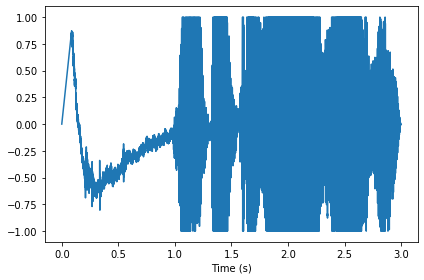

In [131]:
wave.normalize()
wave.apodize()
wave.plot()
decorate(xlabel='Time (s)')

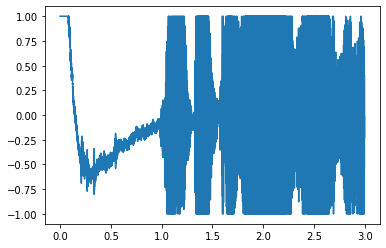

In [133]:
wave.plot()

In [134]:
segment = wave.segment(start=0, duration=3)

In [135]:
spectrum = segment.make_spectrum()

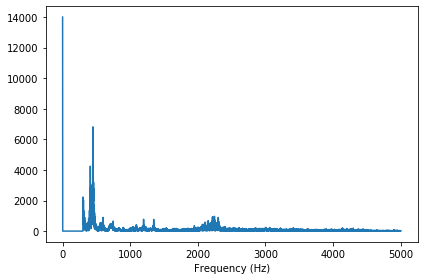

In [176]:
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

In [181]:
wave = read_wave('output.wav')
segment = wave.segment(start=0.2, duration=2.9)
spectrum = segment.make_spectrum()
#spectrum.band_stop(3000, 5000)

In [182]:
filtered = spectrum.make_wave()


In [183]:
filtered.normalize()
filtered.apodize()
filtered.make_audio()